All Rows and Columns of the CPI Dataset:
                  CPIAUCSL
observation_date          
1947-01-01          21.480
1947-02-01          21.620
1947-03-01          22.000
1947-04-01          22.000
1947-05-01          21.950
1947-06-01          22.080
1947-07-01          22.230
1947-08-01          22.400
1947-09-01          22.840
1947-10-01          22.910
1947-11-01          23.060
1947-12-01          23.410
1948-01-01          23.680
1948-02-01          23.670
1948-03-01          23.500
1948-04-01          23.820
1948-05-01          24.010
1948-06-01          24.150
1948-07-01          24.400
1948-08-01          24.430
1948-09-01          24.360
1948-10-01          24.310
1948-11-01          24.160
1948-12-01          24.050
1949-01-01          24.010
1949-02-01          23.910
1949-03-01          23.910
1949-04-01          23.920
1949-05-01          23.910
1949-06-01          23.920
1949-07-01          23.700
1949-08-01          23.700
1949-09-01          23.750
1949-10-01    

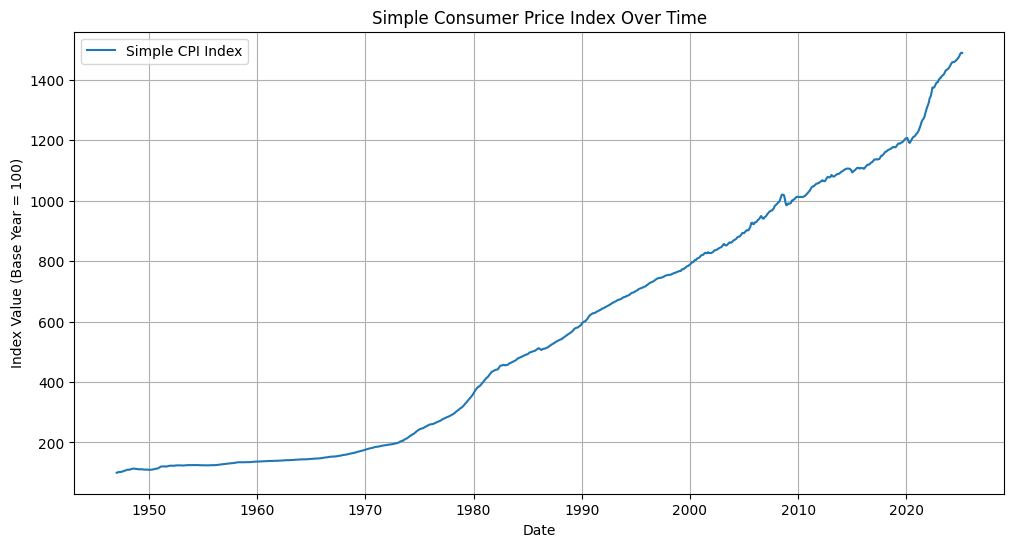


Note: To calculate a true weighted index, you would need data with individual items and their weights. The current dataset only has an aggregate CPI value.
Consider adding a 'Weight' column or using a different dataset for a weighted index calculation.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Consumer Price Index (CPI) dataset from FRED (you'll need to download it first)
# Assuming you downloaded it as 'CPIAUCSL.csv' and it's in your Downloads folder
file_path = 'C:/Users/USER/Downloads/CPIAUCSL.csv'
try:
    df = pd.read_csv(file_path, parse_dates=['observation_date'], index_col='observation_date')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure the CPI dataset is in your Downloads folder.")
    exit()

# Enable showing all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show all rows and columns of the dataset
print("All Rows and Columns of the CPI Dataset:")
print(df)

# Basic Simple Index Number Calculation (using the first value as the base period = 100)
base_value_simple = df['CPIAUCSL'].iloc[0]
df['Simple_Index'] = (df['CPIAUCSL'] / base_value_simple) * 100

print("\nDataset with Simple Index:")
print(df)

# Visualization of the Simple Index Number
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Simple_Index'], label='Simple CPI Index')
plt.title('Simple Consumer Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value (Base Year = 100)')
plt.legend()
plt.grid(True)
plt.show()

# Weighted Index Number Calculation (Example using a hypothetical 'Weight' column - you might need to add this based on your data or understanding)
# For a true weighted index, you would typically have multiple items and their respective prices and weights.
# This example demonstrates the concept if you had such data.

# Assuming you had another column named 'Weight' in your CSV (you might need to create this or load a different dataset)
if 'Weight' in df.columns:
    # Calculate weighted value for each observation
    df['Weighted_Value'] = df['CPIAUCSL'] * df['Weight']

    # Calculate the weighted index (again, using the first weighted value as the base)
    base_weighted_value = df['Weighted_Value'].iloc[0]
    df['Weighted_Index'] = (df['Weighted_Value'] / base_weighted_value) * 100

    print("\nDataset with Weighted Index (if 'Weight' column exists):")
    print(df)

    # Visualization of the Weighted Index Number
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Weighted_Index'], label='Weighted CPI Index')
    plt.title('Weighted Consumer Price Index Over Time (Hypothetical)')
    plt.xlabel('Date')
    plt.ylabel('Index Value (Base Year = 100)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nNote: To calculate a true weighted index, you would need data with individual items and their weights. The current dataset only has an aggregate CPI value.")
    print("Consider adding a 'Weight' column or using a different dataset for a weighted index calculation.")